Group-16(Website Phishing Detection)

Note-The code is executed in Jupyter Notebook Environment and the data set File is loaded by inserting the file path wherever necessary.

In [160]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix


# Exploratory data analysis and Visualization

In [161]:
#read the dataset
df = pd.read_csv("dataset_phishing.csv")
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [162]:
df.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [163]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [166]:
pd.set_option('display.max_rows', 100)
df.isna().sum()

url                           0
length_url                    0
length_hostname               0
ip                            0
nb_dots                       0
nb_hyphens                    0
nb_at                         0
nb_qm                         0
nb_and                        0
nb_or                         0
nb_eq                         0
nb_underscore                 0
nb_tilde                      0
nb_percent                    0
nb_slash                      0
nb_star                       0
nb_colon                      0
nb_comma                      0
nb_semicolumn                 0
nb_dollar                     0
nb_space                      0
nb_www                        0
nb_com                        0
nb_dslash                     0
http_in_path                  0
https_token                   0
ratio_digits_url              0
ratio_digits_host             0
punycode                      0
port                          0
tld_in_path                   0
tld_in_s

In [167]:
df['status'].value_counts()

status
legitimate    5715
phishing      5715
Name: count, dtype: int64

In [168]:
def load_phishing_data(file_path):
    # Load the phishing dataset and drop the first column
    phishing_data = pd.read_csv(file_path)
    phishing_data = phishing_data.iloc[:, 1:]
    
    # Convert class labels from string to numeric
    phishing_data['status'] = phishing_data['status'].replace({'legitimate': 0, 'phishing': 1})
    
    # Separate features (X) and labels (y)
    X = phishing_data.drop("status", axis=1).values
    y = phishing_data["status"].values
 
    return X, y

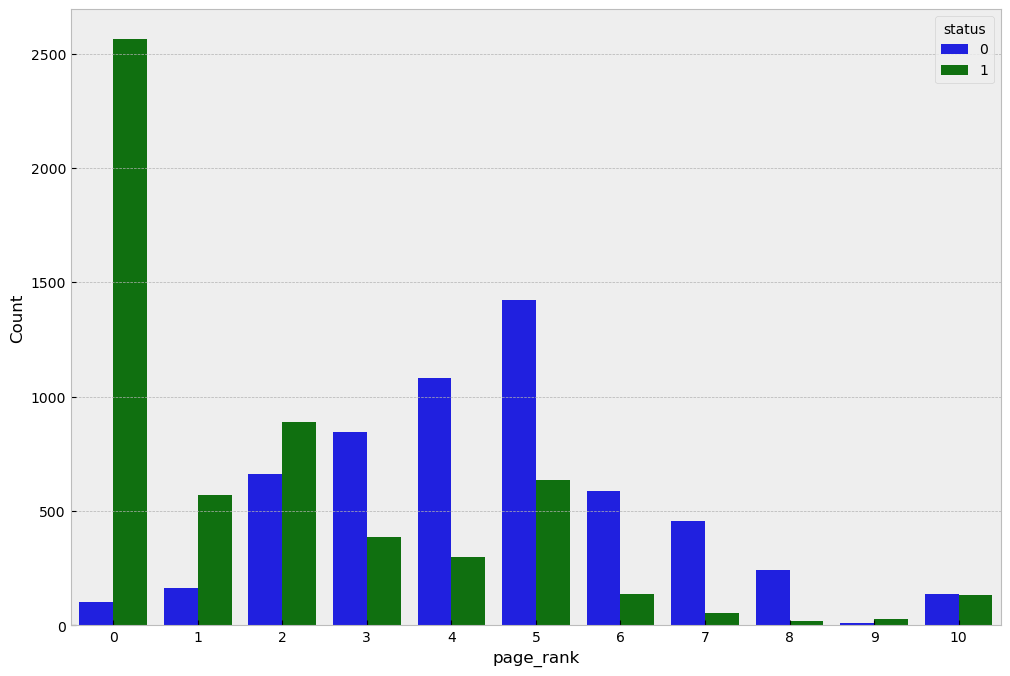

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_feature_distribution(df, feature_name):
    with plt.style.context(style="bmh"):
        plt.figure(figsize=(12, 8))
        sns.countplot(x=feature_name, hue="status", data=df, palette={1: "green", 0: "blue"})
        plt.xlabel(feature_name)
        plt.ylabel("Count")
        plt.show()

# Assuming 'status' column is already defined
df['status'] = df['status'].replace({'legitimate': 0, 'phishing': 1})

# Call the function to plot the distribution of a specific feature (e.g., 'page_rank')
plot_feature_distribution(df, 'page_rank')

In [170]:

likely_cat = {}
for var in df.iloc[:,1:].columns:
    likely_cat[var] = 1.*df[var].nunique()/df[var].count() < 0.002 

num_cols = []
cat_cols = []
for col in likely_cat.keys():
    if (likely_cat[col] == False):
        num_cols.append(col)
    else:
        cat_cols.append(col)

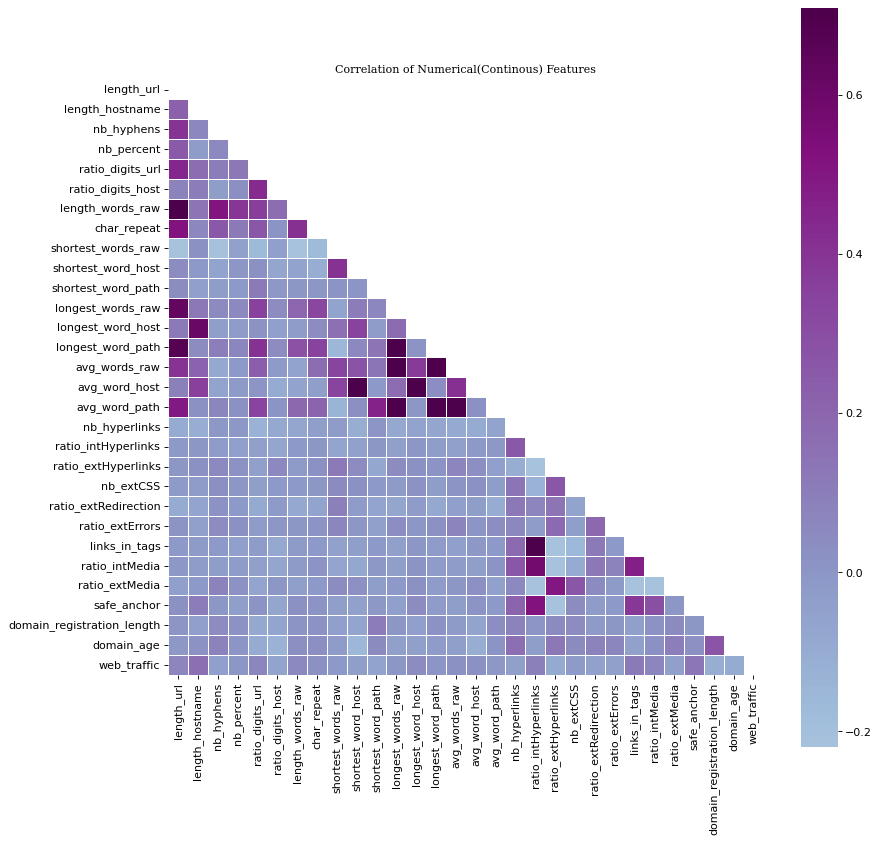

In [171]:
#Taking all columns except URL 
corr = df[num_cols].corr()

fig = plt.figure(figsize=(12,12),dpi=80)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='BuPu', robust=True, center=0,
            square=True, linewidths=.5)
plt.title('Correlation of Numerical(Continous) Features', fontsize=15,font="Serif")
plt.show()

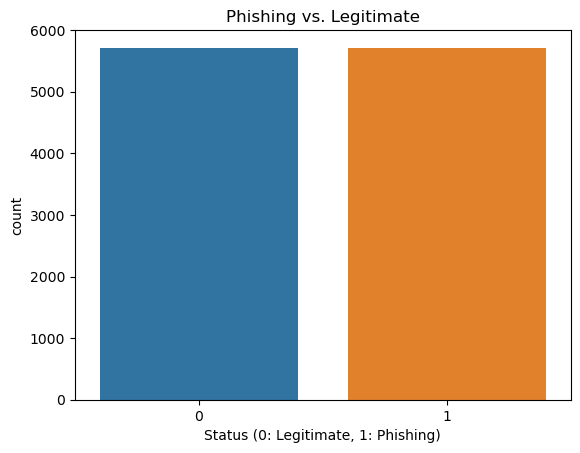

In [172]:
# Load the phishing dataset using the provided function
file_path = "C:/Users/theja/Downloads/ML project/ML project/dataset_phishing.csv"
X, y = load_phishing_data(file_path)

# 1. Countplot of Phishing vs. Legitimate
sns.countplot(x=y)
plt.title("Phishing vs. Legitimate")
plt.xlabel("Status (0: Legitimate, 1: Phishing)")
plt.show()

C:\Users\theja\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


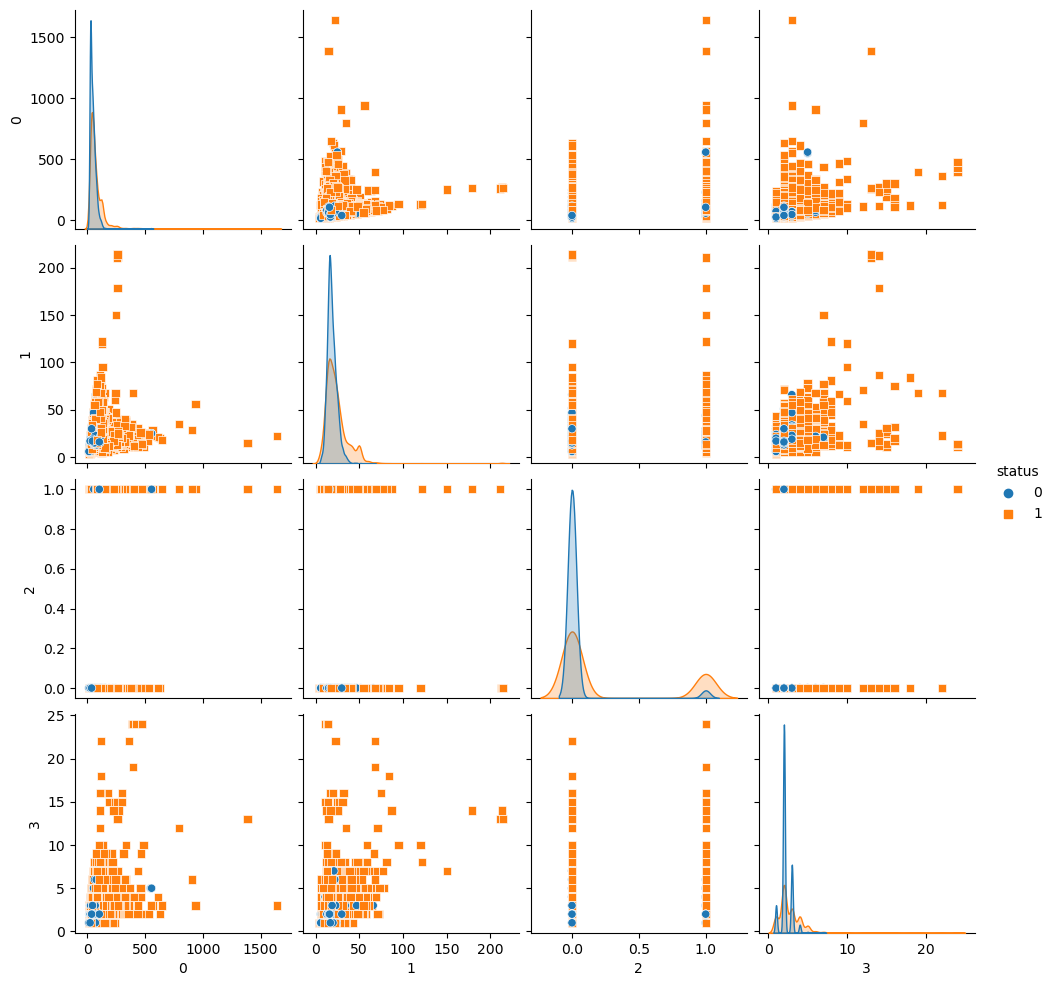

In [173]:
# 2. Pairplot of Select Features
selected_features = [0, 1, 2, 3]  # Replace with feature indices you want
pairplot_data = pd.DataFrame(data=X[:, selected_features], columns=selected_features)
pairplot_data["status"] = y
sns.pairplot(pairplot_data, hue="status", markers=["o", "s"])
plt.show()

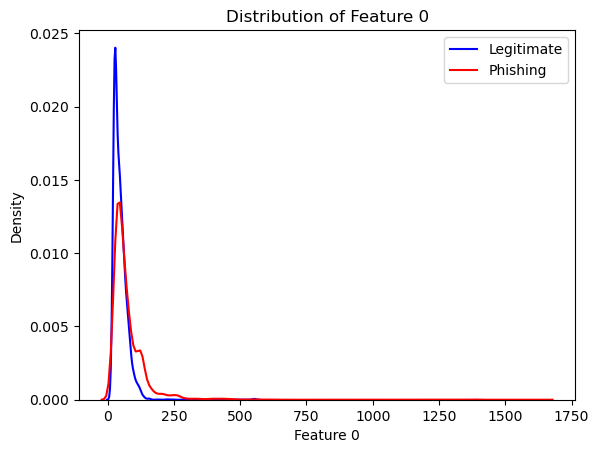

In [174]:
# 6. Distribution of Feature Values
feature_index = 0  # Replace with the index of the feature you want to visualize
legitimate_samples = X[y == 0, feature_index]
phishing_samples = X[y == 1, feature_index]
feature_index = 0  # Replace with the index of the feature you want to visualize
sns.kdeplot(legitimate_samples, label="Legitimate", color="blue")
sns.kdeplot(phishing_samples, label="Phishing", color="red")
plt.title(f"Distribution of Feature {feature_index}")
plt.xlabel(f"Feature {feature_index}")
plt.legend()
plt.show()

# Model building

In [175]:
file_path = "C:/Users/theja/Downloads/ML project/ML project/dataset_phishing.csv"

### K-Nearest neignbours

In [176]:
def evaluate_knn(X, y, n_neighbors=3, n_splits=10):
    # Create a StratifiedKFold iterator
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Initialize metrics lists
    exac, sens, prec, f1s, cm = [], [], [], [], []

    # Iterate over folds
    for train_idx, test_idx in skf.split(X, y):
        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[test_idx], y[test_idx]

        # Train KNN classifier with n_neighbors
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn.fit(X_train, y_train)

        # Predict on the test set
        y_pred = knn.predict(X_test)

        # Calculate and store metrics for this fold
        exac.append(accuracy_score(y_test, y_pred))
        sens.append(recall_score(y_test, y_pred, average='macro'))
        prec.append(precision_score(y_test, y_pred, average='macro'))
        f1s.append(f1_score(y_test, y_pred, average='macro'))
        cm.append(confusion_matrix(y_test, y_pred))

    # Calculate and report the mean of the metrics
    mean_exac = np.mean(exac)
    mean_sens = np.mean(sens)
    mean_prec = np.mean(prec)
    mean_f1s = np.mean(f1s)
    cm=np.mean(cm,axis=0)
    
    return mean_exac, mean_sens, mean_prec, mean_f1s, cm


In [177]:
if __name__ == "__main__":
    file_path = "C:/Users/theja/Downloads/ML project/ML project/dataset_phishing.csv"
    X, y = load_phishing_data(file_path)

    n_neighbors = 3
    n_splits = 10

    mean_exac, mean_sens, mean_prec, mean_f1s, cm = evaluate_knn(X, y, n_neighbors, n_splits)

    print(f"Accuracy: {mean_exac:.2f}")
    print(f"Sensitivity: {mean_sens:.2f}")
    print(f"Precision: {mean_prec:.2f}")
    print(f"F1-score: {mean_f1s:.2f}")
    print("Confusion Matrix:",cm,sep='\n')

Accuracy: 0.84
Sensitivity: 0.84
Precision: 0.84
F1-score: 0.84
Confusion Matrix:
[[470.3 101.2]
 [ 78.  493.5]]


### Navie bayes

In [178]:
def evaluate_naive_bayes(X, y, n_splits=10):
    # Create a StratifiedKFold iterator
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Initialize metrics lists
    exac, sens, prec, f1s, cm = [], [], [], [], []

    # Iterate over folds
    for train_idx, test_idx in skf.split(X, y):
        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[test_idx], y[test_idx]

        # Train Gaussian Naive Bayes classifier
        nb = GaussianNB()
        nb.fit(X_train, y_train)

        # Predict on the test set
        y_pred = nb.predict(X_test)

        # Calculate and store metrics for this fold
        exac.append(accuracy_score(y_test, y_pred))
        sens.append(recall_score(y_test, y_pred, average='macro'))
        prec.append(precision_score(y_test, y_pred, average='macro'))
        f1s.append(f1_score(y_test, y_pred, average='macro'))
        cm.append(confusion_matrix(y_test, y_pred))

    # Calculate and report the mean of the metrics
    mean_exac = np.mean(exac)
    mean_sens = np.mean(sens)
    mean_prec = np.mean(prec)
    mean_f1s = np.mean(f1s)
    cm=np.mean(cm,axis=0)
    return mean_exac, mean_sens, mean_prec, mean_f1s, cm

In [179]:
if __name__ == "__main__":
    file_path = "C:/Users/theja/Downloads/ML project/ML project/dataset_phishing.csv"
    X, y = load_phishing_data(file_path)
    n_splits = 10

    mean_exac, mean_sens, mean_prec, mean_f1s, cm = evaluate_naive_bayes(X, y, n_splits)

    print(f"Accuracy: {mean_exac:.2f}")
    print(f"Sensitivity: {mean_sens:.2f}")
    print(f"Precision: {mean_prec:.2f}")
    print(f"F1-score: {mean_f1s:.2f}")
    print("Confusion Matrix:",cm,sep='\n')


Accuracy: 0.75
Sensitivity: 0.75
Precision: 0.76
F1-score: 0.74
Confusion Matrix:
[[354.4 217.1]
 [ 73.8 497.7]]


### Decision Tree

In [180]:
def decision_tree_classification(X, y):
    # Create a 10-fold iterator
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Initialize metrics
    accuracy_list = []
    sensitivity_list = []
    precision_list = []
    f1_score_list = []
    cm = []

    # Iterate through the folds
    for train_index, test_index in skf.split(X, y):
        # Split the data into training and testing sets
        X_train, X_test = X[train_index], X[test_index]  # Training
        y_train, y_test = y[train_index], y[test_index]  # Testing

        # Train a decision tree classifier using the Gini impurity criterion
        model = DecisionTreeClassifier(criterion='gini')
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Calculate and store the metrics for this fold
        accuracy_list.append(accuracy_score(y_test, y_pred))
        sensitivity_list.append(recall_score(y_test, y_pred, average='macro'))
        precision_list.append(precision_score(y_test, y_pred, average='macro'))
        f1_score_list.append(f1_score(y_test, y_pred, average='macro'))
        cm.append(confusion_matrix(y_test, y_pred))

    # Calculate the mean of the metrics
    mean_accuracy = np.mean(accuracy_list)
    mean_sensitivity = np.mean(sensitivity_list)
    mean_precision = np.mean(precision_list)
    mean_f1_score = np.mean(f1_score_list)
    cm=np.mean(cm,axis=0)

    # Return the mean metrics
    return mean_accuracy, mean_sensitivity, mean_precision, mean_f1_score, cm


In [181]:
if __name__ == "__main__":
    X, y = load_phishing_data(file_path)
    mean_exac, mean_sens, mean_prec, mean_f1s, cm = decision_tree_classification(X, y)

    print(f"Accuracy: {mean_exac:.2f}")
    print(f"Sensitivity: {mean_sens:.2f}")
    print(f"Precision: {mean_prec:.2f}")
    print(f"F1-score: {mean_f1s:.2f}")
    print("Confusion Matrix:",cm,sep='\n')

Accuracy: 0.94
Sensitivity: 0.94
Precision: 0.94
F1-score: 0.94
Confusion Matrix:
[[533.3  38.2]
 [ 35.5 536. ]]


In [182]:
#use to convert model into pickle file

import pickle
from sklearn.tree import DecisionTreeClassifier  # Replace with your actual model import

# Create and train a sample model (replace this with your actual model creation and training)
model = DecisionTreeClassifier(criterion='gini')
model.fit(X, y)

# Define a file name for the pickle file
model_file_name = 'trained_model.pkl'

# Save the trained model to a pickle file
with open(model_file_name, 'wb') as model_file:
    pickle.dump(model, model_file)
   

print(f"Model saved as {model_file_name}")


Model saved as trained_model.pkl


### neural Networks

In [183]:

def train_neural_network(X, y):
    # Create a 10-fold iterator
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Initialize metrics
    accuracy_list = []
    sensitivity_list = []
    precision_list = []
    f1_score_list = []
    cm = []
    # Iterate through the folds
    for train_index, test_index in skf.split(X, y):
        # Split the data into training and testing sets
        X_train, X_test = X[train_index], X[test_index]  # Training
        y_train, y_test = y[train_index], y[test_index]  # Testing

        # Create and train the MLPClassifier with a learning rate of 0.01
        mlp = MLPClassifier(
            solver='adam',
            hidden_layer_sizes=(20,),
            activation='tanh',
            max_iter=20,
            validation_fraction=0.2,
            learning_rate_init=0.01,
        )

        # Train the neural network
        mlp.fit(X_train, y_train)

        # Predict on the test set
        y_pred = mlp.predict(X_test)

        # Calculate and store the metrics for this fold
        accuracy_list.append(accuracy_score(y_test, y_pred))
        sensitivity_list.append(recall_score(y_test, y_pred, average='macro'))
        precision_list.append(precision_score(y_test, y_pred, average='macro'))
        f1_score_list.append(f1_score(y_test, y_pred, average='macro'))
        cm.append(confusion_matrix(y_test, y_pred))

    # Calculate the mean of the metrics
    mean_accuracy = np.mean(accuracy_list)
    mean_sensitivity = np.mean(sensitivity_list)
    mean_precision = np.mean(precision_list)
    mean_f1_score = np.mean(f1_score_list)
    cm=np.mean(cm,axis=0)
    # Return the mean metrics
    return mean_accuracy, mean_sensitivity, mean_precision, mean_f1_score, cm


In [184]:
if __name__ == "__main__":
    file_path = "C:/Users/theja/Downloads/ML project/ML project/dataset_phishing.csv"
    X, y = load_phishing_data(file_path)
    mean_exac, mean_sens, mean_prec, mean_f1s, cm = train_neural_network(X, y)

    print(f"Accuracy: {mean_exac:.2f}")
    print(f"Sensitivity: {mean_sens:.2f}")
    print(f"Precision: {mean_prec:.2f}")
    print(f"F1-score: {mean_f1s:.2f}")
    print("Confusion Matrix:",cm,sep='\n')


C:\Users\theja\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\theja\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\theja\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\theja\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\theja\anaconda3\Lib\site-packages\sklearn\neural_network\_multilaye

Accuracy: 0.71
Sensitivity: 0.71
Precision: 0.73
F1-score: 0.71
Confusion Matrix:
[[476.2  95.3]
 [231.5 340. ]]


C:\Users\theja\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


### Metrics Plotting

K-Nearest Neighbors:
Accuracy: 0.84
Sensitivity: 0.84
Precision: 0.84
F1-score: 0.84
Naive Bayes:
Accuracy: 0.75
Sensitivity: 0.75
Precision: 0.76
F1-score: 0.74
Decision Tree:
Accuracy: 0.94
Sensitivity: 0.94
Precision: 0.94
F1-score: 0.94


C:\Users\theja\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\theja\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\theja\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\theja\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\theja\anaconda3\Lib\site-packages\sklearn\neural_network\_multilaye

Neural Network:
Accuracy: 0.72
Sensitivity: 0.72
Precision: 0.77
F1-score: 0.71


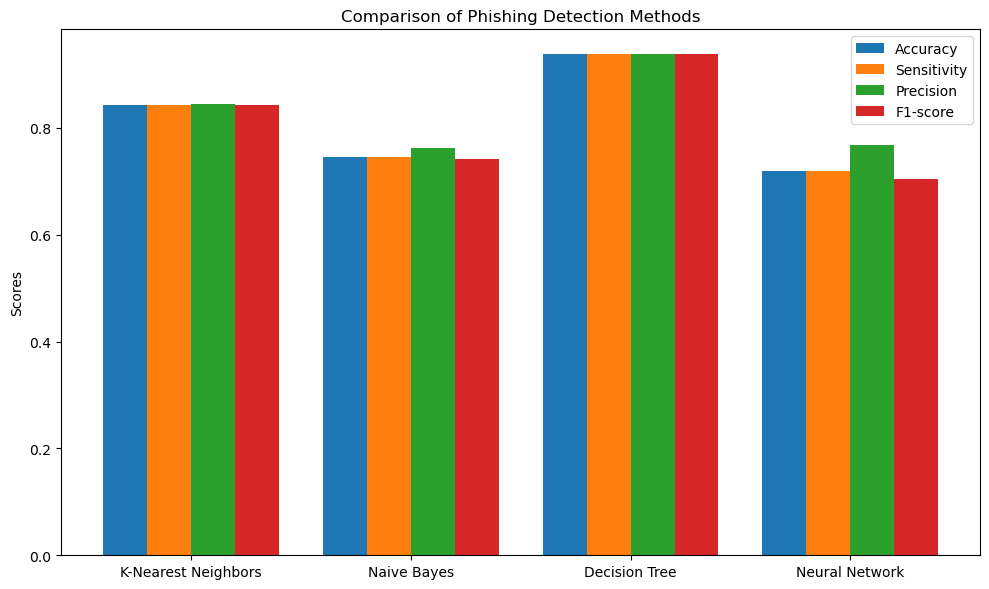

In [185]:

# Define a list of classifiers and their names
classifiers = [
    (evaluate_knn, 'K-Nearest Neighbors'),
    (evaluate_naive_bayes, 'Naive Bayes'),
    (decision_tree_classification, 'Decision Tree'),
    (train_neural_network, 'Neural Network')
]

# Initialize lists to store evaluation results
accuracy_scores = []
sensitivity_scores = []
precision_scores = []
f1_scores = []

# Load the dataset
file_path = "C:/Users/theja/Downloads/ML project/ML project/dataset_phishing.csv"
X, y = load_phishing_data(file_path)

# Iterate through each classifier and collect evaluation results
for classifier_func, classifier_name in classifiers:
    mean_exac, mean_sens, mean_prec, mean_f1s, cm = classifier_func(X, y)
    accuracy_scores.append(mean_exac)
    sensitivity_scores.append(mean_sens)
    precision_scores.append(mean_prec)
    f1_scores.append(mean_f1s)
    # Print individual scores for each classifier
    print(f"{classifier_name}:")
    print(f"Accuracy: {mean_exac:.2f}")
    print(f"Sensitivity: {mean_sens:.2f}")
    print(f"Precision: {mean_prec:.2f}")
    print(f"F1-score: {mean_f1s:.2f}")
    
# Plot the results
labels = [classifier_name for _, classifier_name in classifiers]
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - 0.3, accuracy_scores, 0.2, label='Accuracy')
ax.bar(x - 0.1, sensitivity_scores, 0.2, label='Sensitivity')
ax.bar(x + 0.1, precision_scores, 0.2, label='Precision')
ax.bar(x + 0.3, f1_scores, 0.2, label='F1-score')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Phishing Detection Methods')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()